# Libraries

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from noisegt import noisegt
import audiofile as af

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


# Envelope detection filter

## Parameters

In [2]:
omegas = [0.01, 0.1, 0.3]
As = [0.7 ,0.8, 0.9, 0.99]
numSamples = 2000

## Filter response

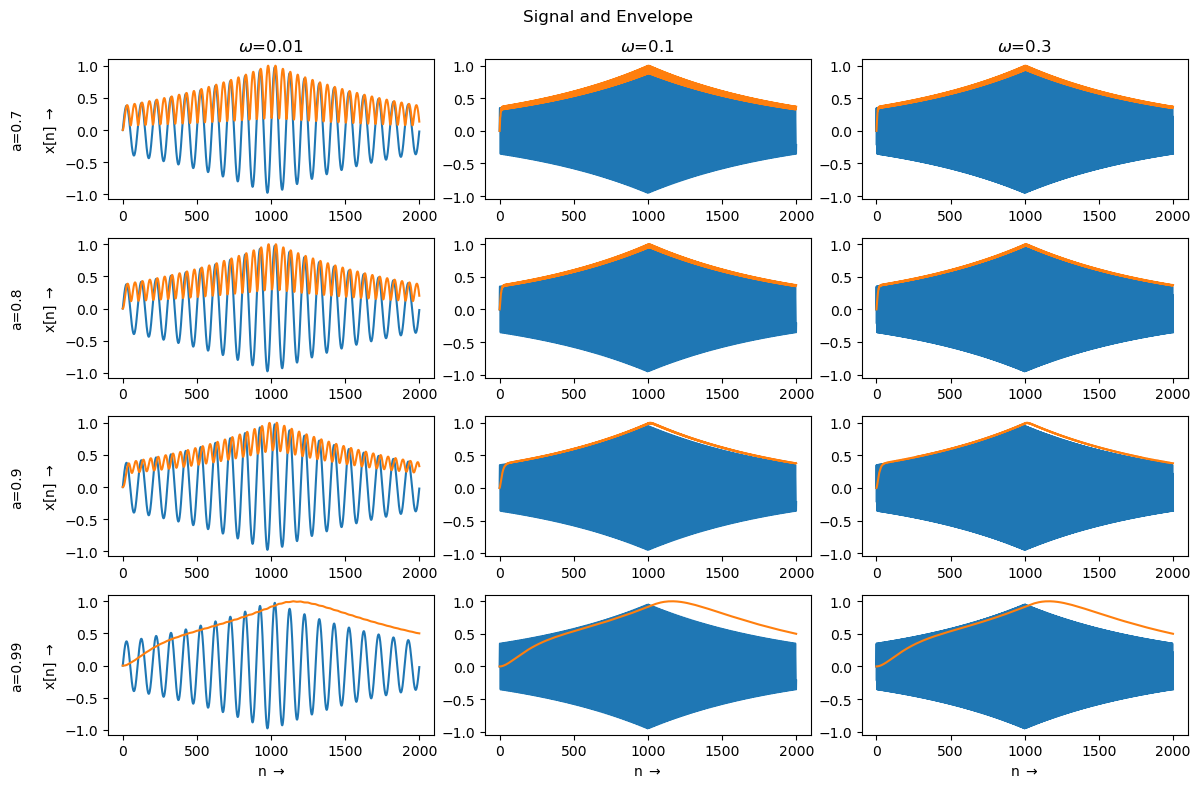

In [3]:

n = np.arange(numSamples)
i = 0; k= 0
lin = len(As)
col = len(omegas)
plt.figure(figsize=(12,8))
plt.ylabel(r'Signal and envelope $\rightarrow$')
for a in As:
    i = i+1
    j = 0
    for w in omegas:
        j = j+1
        k = k+1
    
        x = np.sin(n*2*np.pi*w)
        ev = np.exp(n[:1000]/1000 -1)
        ev2 = np.exp(1 - n[1000:]/1000)
        ev = np.array([ev,ev2]).ravel()
        xm = x*ev
        
        B = [(1-a)**2]
        A = [1,-2*a, a**2]
        ws,H = sig.freqz(B,A)
        xf = sig.lfilter(B,A,abs(xm))
        xf = xf/xf.max()
        
        plt.subplot(lin,col,k)
        plt.plot(xm)
        plt.plot(xf)
        if i ==1:
            plt.title(r'$\omega$='+str(w))
        if j==1:
            plt.ylabel('a='+str(a)+'\n\n' + r'x[n] $\rightarrow$')
        
        if i ==lin: plt.xlabel(r'n $\rightarrow$')
fig = plt.gcf()
fig.suptitle('Signal and Envelope')
plt.tight_layout()

plt.show()

# Noise Gate test

## Test song - 'Matchbox 20 - Disease'

### Parameters

In [4]:
holdTime = 0.005
lowerThreshold = 0.075
upperThreshold = 0.09
releaseTime = 0.1
attackTime = 0.01
poleEnvelopeFilter = 0.999
filePath = 'audios\\mb20_disease.wav'

### Audio processing

In [5]:
x, fs = af.read(filePath)
y,g,e = noisegt(x, holdTime, lowerThreshold, upperThreshold, releaseTime, attackTime, poleEnvelopeFilter, fs, 'yge')
outputFile = filePath.split('.wav')[0] + '_ng.wav'
af.write(outputFile,y,fs,16)

### In/out curve

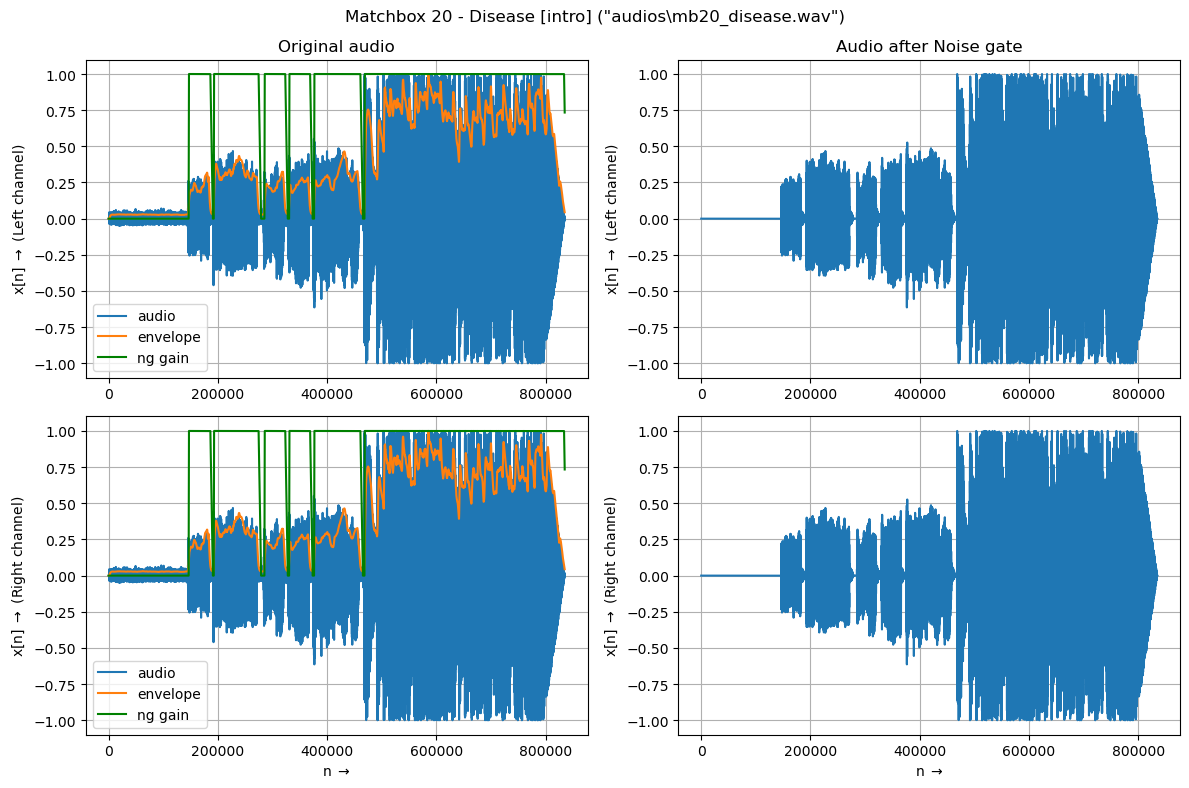

In [6]:
plt.figure(figsize=(12,8))
fig = plt.gcf()
fig.suptitle('Matchbox 20 - Disease [intro] ("'+ filePath + '")')
plt.subplot(221)
plt.title('Original audio')
plt.ylabel(r'x[n] $\rightarrow$ (Left channel)')
plt.plot(x[0,:],label='audio')
plt.plot(e[0,:], label = 'envelope')
plt.plot(g[0,:],'g-', label='ng gain')
plt.legend()
plt.grid()
plt.subplot(223)
plt.ylabel(r'x[n] $\rightarrow$ (Right channel)')
plt.plot(x[1,:],label='audio')
plt.plot(e[1,:], label = 'envelope')
plt.plot(g[1,:],'g-', label='ng gain')
plt.legend()
plt.xlabel(r'n $\rightarrow$')
plt.grid()
plt.subplot(222)
plt.title('Audio after Noise gate')
plt.ylabel(r'x[n] $\rightarrow$ (Left channel)')
plt.plot(y[0,:])
plt.grid()
plt.subplot(224)
plt.ylabel(r'x[n] $\rightarrow$ (Right channel)')
plt.plot(y[1,:])
plt.xlabel(r'n $\rightarrow$')
plt.grid()
plt.tight_layout()
plt.show()

### Alternative thresholds example

In [7]:
lowerThreshold = 0.2
upperThreshold = 0.25

y2 = noisegt(x, holdTime, lowerThreshold, upperThreshold, releaseTime, attackTime, poleEnvelopeFilter, fs)

outputFile = filePath.split('.wav')[0] + '_ng_lt_'+str(lowerThreshold)+'.wav'
af.write(outputFile,y,fs,16)

## Test audio - snare drum

### Parameters

In [8]:
holdTime = 0.005
lowerThreshold = 0.10
upperThreshold = 0.15
releaseTime = 0.05
attackTime = 0.01
poleEnvelopeFilter = 0.99
filePath = 'audios\\tarol_lento.wav'

### Audio processing

In [9]:
x, fs = af.read(filePath)
y,g,e = noisegt(x, holdTime, lowerThreshold, upperThreshold, releaseTime, attackTime, poleEnvelopeFilter, fs, 'yge')
outputFile = filePath.split('.wav')[0] + '_ng.wav'
af.write(outputFile,y,fs,16)

### In/out curve

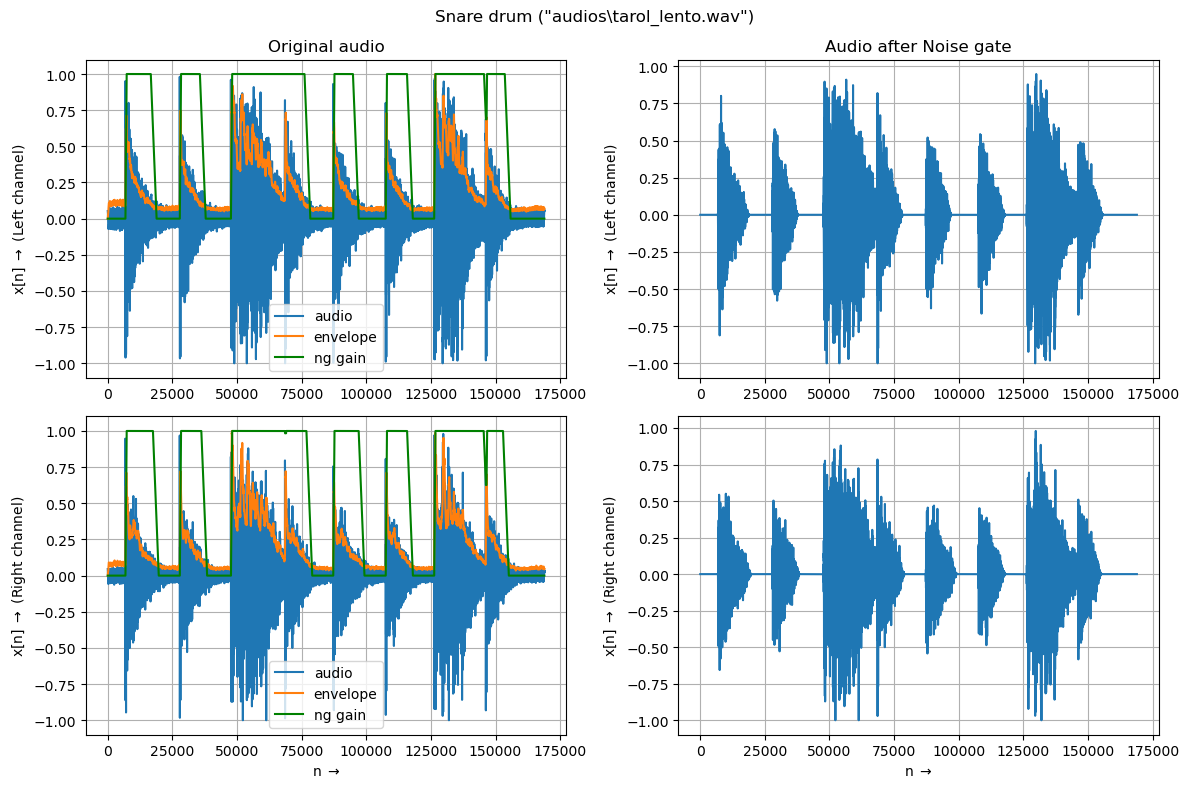

In [10]:
plt.figure(figsize=(12,8))
fig = plt.gcf()
fig.suptitle('Snare drum ("'+ filePath + '")')
plt.subplot(221)
plt.title('Original audio')
plt.ylabel(r'x[n] $\rightarrow$ (Left channel)')
plt.plot(x[0,:],label='audio')
plt.plot(e[0,:], label = 'envelope')
plt.plot(g[0,:],'g-', label='ng gain')
plt.legend()
plt.grid()
plt.subplot(223)
plt.ylabel(r'x[n] $\rightarrow$ (Right channel)')
plt.plot(x[1,:],label='audio')
plt.plot(e[1,:], label = 'envelope')
plt.plot(g[1,:],'g-', label='ng gain')
plt.legend()
plt.xlabel(r'n $\rightarrow$')
plt.grid()
plt.subplot(222)
plt.title('Audio after Noise gate')
plt.ylabel(r'x[n] $\rightarrow$ (Left channel)')
plt.plot(y[0,:])
plt.grid()
plt.subplot(224)
plt.ylabel(r'x[n] $\rightarrow$ (Right channel)')
plt.plot(y[1,:])
plt.xlabel(r'n $\rightarrow$')
plt.grid()
plt.tight_layout()
plt.show()